In [1]:
%matplotlib inline
import pandas as pd
import folium

In [2]:
from IPython.core.display import HTML
css = open('../css/style-table.css').read() + open('../css/style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

Helpful Links
======

[Brandon Rhodes Github](https://github.com/brandon-rhodes/pycon-pandas-tutorial/)

[Changing Data Types](https://www.ritchieng.com/pandas-changing-datatype/)

[Renaming Columns](https://cmdlinetips.com/2018/03/how-to-change-column-names-and-row-indexes-in-pandas/)

[Jupyter Notebooks for Beginners](https://www.dataquest.io/blog/jupyter-notebook-tutorial/)

In [3]:
df = pd.read_csv('../data/tornadoes.csv', encoding = "ISO-8859-1")

In [4]:
df.head()

,YYYY_LOCAL,MM_LOCAL,DD_LOCAL,HHMM_LOCAL,YYYYMMDDHH,YYYY_SOLAR,MM_SOLAR,DD_SOLAR,HHMM_SOLAR,NEAR_CMMTY,...,END_LON_W,LENGTH_M,MOTION_DEG,WIDTH_MAX_,HUMAN_FATA,HUMAN_INJ,ANIMAL_FAT,ANIMAL_INJ,DMG_THOUS,FORECAST_R
0,1980.0,4.0,6.0,1920.0,19800407 0020,1980.0,4.0,6.0,1847.0,Altona,...,-999.000000,-999,-999,-999,-999,-999,-999,-999,-999.0,Morden - Winkler - Altona - Emerson - Morris
1,1980.0,5.0,5.0,2000.0,19800506 2300,1980.0,5.0,5.0,1839.0,Stratford,...,-80.963823,4190,265,30,-999,-999,-999,-999,-999.0,Huron - Perth
2,1980.0,5.0,25.0,1750.0,19800525 2350,1980.0,5.0,25.0,1559.0,Creelman,...,-999.000000,-999,-999,-999,-999,-999,-999,-999,-999.0,Estevan - Weyburn - Radville - Milestone
3,1980.0,5.0,28.0,1700.0,19800528 2200,1980.0,5.0,28.0,1530.0,16 km S of Morden,...,-999.000000,-999,-999,-999,-999,-999,-999,-999,-999.0,Morden - Winkler - Altona - Emerson - Morris
4,1980.0,5.0,31.0,1334.0,19800531 1734,1980.0,5.0,31.0,1217.0,Georgetown to Woodbridge,...,-79.643235,26300,245,490,0,0,0,0,900.0,Halton - Peel


In [5]:
# Number of tornadoes recorded in Canada from 1980 to 2009
len(df)

1839

In [6]:
df.dtypes

YYYY_LOCAL    float64
MM_LOCAL      float64
DD_LOCAL      float64
HHMM_LOCAL    float64
YYYYMMDDHH     object
YYYY_SOLAR    float64
MM_SOLAR      float64
DD_SOLAR      float64
HHMM_SOLAR    float64
NEAR_CMMTY     object
PROVINCE       object
FUJITA          int64
START_LAT_    float64
START_LON_    float64
END_LAT_N     float64
END_LON_W     float64
LENGTH_M        int64
MOTION_DEG      int64
WIDTH_MAX_      int64
HUMAN_FATA      int64
HUMAN_INJ       int64
ANIMAL_FAT      int64
ANIMAL_INJ      int64
DMG_THOUS     float64
FORECAST_R     object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 25 columns):
YYYY_LOCAL    1839 non-null float64
MM_LOCAL      1839 non-null float64
DD_LOCAL      1839 non-null float64
HHMM_LOCAL    1839 non-null float64
YYYYMMDDHH    1714 non-null object
YYYY_SOLAR    1839 non-null float64
MM_SOLAR      1839 non-null float64
DD_SOLAR      1839 non-null float64
HHMM_SOLAR    1839 non-null float64
NEAR_CMMTY    1839 non-null object
PROVINCE      1839 non-null object
FUJITA        1839 non-null int64
START_LAT_    1839 non-null float64
START_LON_    1839 non-null float64
END_LAT_N     1839 non-null float64
END_LON_W     1839 non-null float64
LENGTH_M      1839 non-null int64
MOTION_DEG    1839 non-null int64
WIDTH_MAX_    1839 non-null int64
HUMAN_FATA    1839 non-null int64
HUMAN_INJ     1839 non-null int64
ANIMAL_FAT    1839 non-null int64
ANIMAL_INJ    1839 non-null int64
DMG_THOUS     1839 non-null float64
FORECAST_R    1839 non-null object
dtypes: float

In [8]:
df.DMG_THOUS.unique()

array([-9.99e+02,  9.00e+02,  1.00e+00,  5.00e+01,  5.00e+02,  2.00e+01,
        1.00e+02,  7.60e+02,  1.10e+01,  4.00e+00,  1.00e+01,  1.00e+03,
        2.00e+02,  2.00e+00,  8.00e+00,  2.00e+04,  0.00e+00,  1.20e+03,
        3.00e+02,  5.00e+03,  5.00e+00,  2.00e+03,  1.50e+01,  2.50e+03,
        1.50e+05,  4.00e+01,  2.50e+02,  4.00e+03,  1.30e+02,  2.50e+01,
        2.60e+05,  7.50e+01,  3.50e+00,  1.60e+01,  1.70e+04,  3.00e+01,
        8.00e+03,  7.50e+02,  2.60e+03,  2.50e+00,  1.50e+03,  6.50e+03,
        1.20e+02,  1.80e+01,  6.00e+01,  3.50e+02,  1.20e+04,  2.80e+02,
        5.00e-01])

In [9]:
columns_of_interest = ['YYYY_LOCAL', 'MM_LOCAL', 'DD_LOCAL', 'HHMM_LOCAL',
        'NEAR_CMMTY',
       'PROVINCE', 'START_LAT_', 'START_LON_', 'END_LAT_N',
       'END_LON_W', 'LENGTH_M', 'MOTION_DEG', 'WIDTH_MAX_']
df = df[columns_of_interest]

In [10]:
df.head()

,YYYY_LOCAL,MM_LOCAL,DD_LOCAL,HHMM_LOCAL,NEAR_CMMTY,PROVINCE,START_LAT_,START_LON_,END_LAT_N,END_LON_W,LENGTH_M,MOTION_DEG,WIDTH_MAX_
0,1980.0,4.0,6.0,1920.0,Altona,MB,49.105000,-97.568000,-999.000000,-999.000000,-999,-999,-999
1,1980.0,5.0,5.0,2000.0,Stratford,ON,43.385625,-81.012735,43.389700,-80.963823,4190,265,30
2,1980.0,5.0,25.0,1750.0,Creelman,SK,49.840000,-103.630000,-999.000000,-999.000000,-999,-999,-999
3,1980.0,5.0,28.0,1700.0,16 km S of Morden,MB,49.190000,-98.100000,-999.000000,-999.000000,-999,-999,-999
4,1980.0,5.0,31.0,1334.0,Georgetown to Woodbridge,ON,43.652990,-79.930887,43.762647,-79.643235,26300,245,490


In [11]:
df.columns=['year', 'month', 'day', 'hhmm', 'community', 'province', 'start_lat_n', 'start_lon_w', 'end_lat_n', 'end_lon_w',
           'length', 'motion_deg', 'width_max']

In [12]:
df.head(20)

,year,month,day,hhmm,community,province,start_lat_n,start_lon_w,end_lat_n,end_lon_w,length,motion_deg,width_max
0,1980.0,4.0,6.0,1920.0,Altona,MB,49.105000,-97.568000,-999.000000,-999.000000,-999,-999,-999
1,1980.0,5.0,5.0,2000.0,Stratford,ON,43.385625,-81.012735,43.389700,-80.963823,4190,265,30
2,1980.0,5.0,25.0,1750.0,Creelman,SK,49.840000,-103.630000,-999.000000,-999.000000,-999,-999,-999
3,1980.0,5.0,28.0,1700.0,16 km S of Morden,MB,49.190000,-98.100000,-999.000000,-999.000000,-999,-999,-999
4,1980.0,5.0,31.0,1334.0,Georgetown to Woodbridge,ON,43.652990,-79.930887,43.762647,-79.643235,26300,245,490
5,1980.0,6.0,9.0,1115.0,Whitby,ON,43.883971,-78.971305,43.883653,-78.970864,50,315,-999
6,1980.0,6.0,23.0,2000.0,Francis,SK,50.102000,-103.867000,-999.000000,-999.000000,-999,-999,-999
7,1980.0,6.0,23.0,2200.0,Ebenezer,SK,51.369000,-102.452000,-999.000000,-999.000000,-999,-999,-999
8,1980.0,7.0,6.0,1505.0,Prince Albert,SK,53.191000,-105.721000,-999.000000,-999.000000,-999,-999,-999
9,1980.0,7.0,10.0,2230.0,Fairy Glen to Gronlid,SK,53.068000,-104.483000,-999.000000,-999.000000,-999,-999,-999


In [13]:
# Over 80% of reading don't provide end lon/lat
df.end_lon_w.value_counts().head()

-999.000    1580
-79.545        2
-80.823        2
-79.305        1
-84.017        1
Name: end_lon_w, dtype: int64

In [14]:
df.dtypes

year           float64
month          float64
day            float64
hhmm           float64
community       object
province        object
start_lat_n    float64
start_lon_w    float64
end_lat_n      float64
end_lon_w      float64
length           int64
motion_deg       int64
width_max        int64
dtype: object

In [15]:
df['year'] = df.year.astype(int)
df['month'] = df.month.astype(int)
df['day'] = df.day.astype(int)
df['hhmm'] = df.hhmm.astype(int)
df.head(2)

,year,month,day,hhmm,community,province,start_lat_n,start_lon_w,end_lat_n,end_lon_w,length,motion_deg,width_max
0,1980,4,6,1920,Altona,MB,49.105000,-97.568000,-999.0000,-999.000000,-999,-999,-999
1,1980,5,5,2000,Stratford,ON,43.385625,-81.012735,43.3897,-80.963823,4190,265,30


In [16]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day']], errors='coerce')

In [17]:
df.head()

,year,month,day,hhmm,community,province,start_lat_n,start_lon_w,end_lat_n,end_lon_w,length,motion_deg,width_max,date
0,1980,4,6,1920,Altona,MB,49.105000,-97.568000,-999.000000,-999.000000,-999,-999,-999,1980-04-06
1,1980,5,5,2000,Stratford,ON,43.385625,-81.012735,43.389700,-80.963823,4190,265,30,1980-05-05
2,1980,5,25,1750,Creelman,SK,49.840000,-103.630000,-999.000000,-999.000000,-999,-999,-999,1980-05-25
3,1980,5,28,1700,16 km S of Morden,MB,49.190000,-98.100000,-999.000000,-999.000000,-999,-999,-999,1980-05-28
4,1980,5,31,1334,Georgetown to Woodbridge,ON,43.652990,-79.930887,43.762647,-79.643235,26300,245,490,1980-05-31


In [18]:
df.dtypes

year                    int64
month                   int64
day                     int64
hhmm                    int64
community              object
province               object
start_lat_n           float64
start_lon_w           float64
end_lat_n             float64
end_lon_w             float64
length                  int64
motion_deg              int64
width_max               int64
date           datetime64[ns]
dtype: object

In [19]:
df['hour'] = df['hhmm'].apply(lambda x: str(x)[:-2])

In [20]:
df.head(20)

,year,month,day,hhmm,community,province,start_lat_n,start_lon_w,end_lat_n,end_lon_w,length,motion_deg,width_max,date,hour
0,1980,4,6,1920,Altona,MB,49.105000,-97.568000,-999.000000,-999.000000,-999,-999,-999,1980-04-06,19
1,1980,5,5,2000,Stratford,ON,43.385625,-81.012735,43.389700,-80.963823,4190,265,30,1980-05-05,20
2,1980,5,25,1750,Creelman,SK,49.840000,-103.630000,-999.000000,-999.000000,-999,-999,-999,1980-05-25,17
3,1980,5,28,1700,16 km S of Morden,MB,49.190000,-98.100000,-999.000000,-999.000000,-999,-999,-999,1980-05-28,17
4,1980,5,31,1334,Georgetown to Woodbridge,ON,43.652990,-79.930887,43.762647,-79.643235,26300,245,490,1980-05-31,13
5,1980,6,9,1115,Whitby,ON,43.883971,-78.971305,43.883653,-78.970864,50,315,-999,1980-06-09,11
6,1980,6,23,2000,Francis,SK,50.102000,-103.867000,-999.000000,-999.000000,-999,-999,-999,1980-06-23,20
7,1980,6,23,2200,Ebenezer,SK,51.369000,-102.452000,-999.000000,-999.000000,-999,-999,-999,1980-06-23,22
8,1980,7,6,1505,Prince Albert,SK,53.191000,-105.721000,-999.000000,-999.000000,-999,-999,-999,1980-07-06,15
9,1980,7,10,2230,Fairy Glen to Gronlid,SK,53.068000,-104.483000,-999.000000,-999.000000,-999,-999,-999,1980-07-10,22


In [21]:
df.dtypes

year                    int64
month                   int64
day                     int64
hhmm                    int64
community              object
province               object
start_lat_n           float64
start_lon_w           float64
end_lat_n             float64
end_lon_w             float64
length                  int64
motion_deg              int64
width_max               int64
date           datetime64[ns]
hour                   object
dtype: object

In [22]:
#Most Active years for tornodoes
df.year.value_counts()

1991    94
1999    92
1984    76
1986    73
1990    72
1988    70
1982    69
1983    67
2000    67
1996    67
1989    67
1994    67
2006    65
2005    63
2004    62
2003    62
1987    61
2009    58
1998    57
2008    56
1980    56
1992    54
1993    54
2007    51
2001    50
1997    48
1985    45
1981    41
1995    38
2002    37
Name: year, dtype: int64

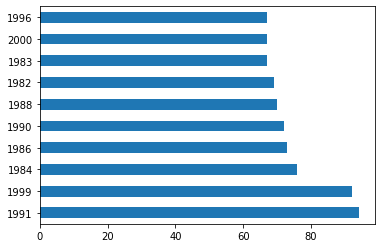

In [23]:
#most active years
df.year.value_counts().head(10).plot(kind='barh')

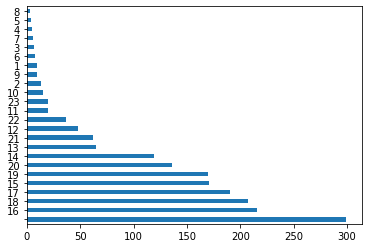

In [24]:
#most active hours of the day
df.hour.value_counts().plot(kind='barh')

Data looks off.  It is unlikely that midnight sees the highest frequency.  More likely that no hour is recorded.

Supper Time appears to be most likely time for a tornado

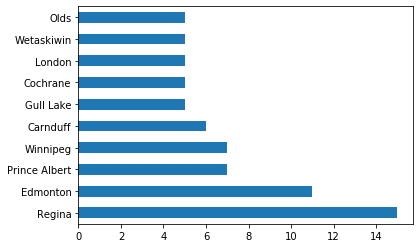

In [25]:
#Top 10 cities have the highest tornado activity
df.community.value_counts().head(10).plot(kind='barh')

cities in western canada see the highest tornado activity (Top 4)

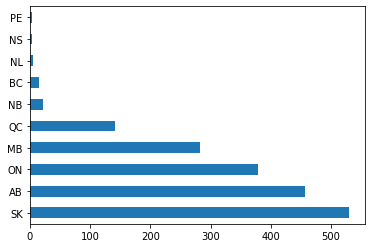

In [26]:
df.province.value_counts().head(10).plot(kind='barh')

In [27]:
df_on = df[df.province == 'ON']
df_on.head()

,year,month,day,hhmm,community,province,start_lat_n,start_lon_w,end_lat_n,end_lon_w,length,motion_deg,width_max,date,hour
1,1980,5,5,2000,Stratford,ON,43.385625,-81.012735,43.389700,-80.963823,4190,265,30,1980-05-05,20
4,1980,5,31,1334,Georgetown to Woodbridge,ON,43.652990,-79.930887,43.762647,-79.643235,26300,245,490,1980-05-31,13
5,1980,6,9,1115,Whitby,ON,43.883971,-78.971305,43.883653,-78.970864,50,315,-999,1980-06-09,11
10,1980,7,15,1505,Wellesley,ON,43.489469,-80.767201,43.494084,-80.749729,1500,250,-999,1980-07-15,15
11,1980,7,16,936,LaSalle,ON,42.244189,-83.100691,42.229000,-83.027000,6350,285,-999,1980-07-16,9


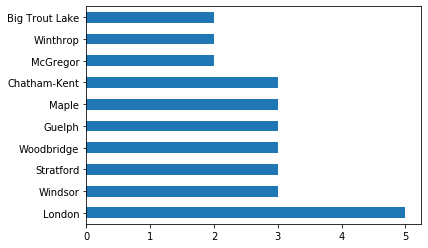

In [28]:
# Top 10 communities in Ontario for tornado activity
df_on.community.value_counts().head(10).plot(kind='barh')

In [29]:
df[df.community == 'Cochrane']

,year,month,day,hhmm,community,province,start_lat_n,start_lon_w,end_lat_n,end_lon_w,length,motion_deg,width_max,date,hour
127,1982,8,8,1545,Cochrane,ON,49.038,-81.388,49.126,-81.383,9820,180,-999,1982-08-08,15
333,1985,6,28,1800,Cochrane,AB,51.180,-114.470,-999.000,-999.000,-999,-999,-999,1985-06-28,18
403,1986,7,13,1530,Cochrane,AB,51.180,-114.470,-999.000,-999.000,-999,-999,-999,1986-07-13,15
1265,1999,0,0,0,Cochrane,AB,51.180,-114.470,-999.000,-999.000,-999,-999,-999,NaT,
1553,2005,6,4,2030,Cochrane,AB,51.180,-114.430,-999.000,-999.000,-999,-999,-999,2005-06-04,20


I assumed Cochrane Ontario had 5 tornadoes but they did not show up in Ontario top 10.  Turns out there is a Cochrane Alberta

In [30]:
len(df.date.unique())

938

## Most active tornadoe days are actually the same tornado systems hitting communities that are in proximity

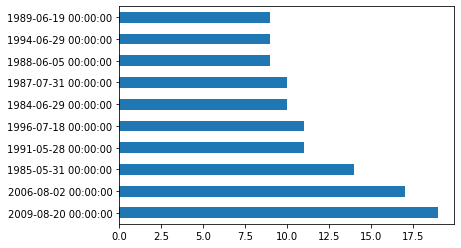

In [31]:
# most active community days for tornadoes
df.date.value_counts().head(10).plot(kind='barh')

In [32]:
#Who had tornadoes on the most active day
df20090820 = df[df.date == '2009-08-20']

In [33]:
# Ontario communities that got hit on 2009-08-20
df20090820

,year,month,day,hhmm,community,province,start_lat_n,start_lon_w,end_lat_n,end_lon_w,length,motion_deg,width_max,date,hour
1811,2009,8,20,1600,Durham,ON,44.077300,-80.934400,44.427500,-80.581100,48000,215,400,2009-08-20,16
1812,2009,8,20,1640,The Blue Mountains,ON,44.454800,-80.482500,44.537000,-80.373300,12500,225,400,2009-08-20,16
1813,2009,8,20,1730,New Lowell,ON,44.352600,-79.974200,44.453900,-79.902100,12600,210,70,2009-08-20,17
1814,2009,8,20,1730,Arnstein,ON,45.885061,-79.955382,45.889943,-79.939481,1340,245,-999,2009-08-20,17
1815,2009,8,20,1750,Newmarket,ON,44.077358,-79.355971,44.094693,-79.336519,2470,220,300,2009-08-20,17
1816,2009,8,20,1805,Woodbridge,ON,43.761134,-79.628703,43.827064,-79.550958,9620,230,-999,2009-08-20,18
1817,2009,8,20,1810,Moonstone,ON,44.629400,-79.679291,44.652118,-79.654182,3220,220,-999,2009-08-20,18
1818,2009,8,20,1830,Dollars Lake,ON,45.934887,-80.224121,45.942346,-80.214683,1100,220,-999,2009-08-20,18
1819,2009,8,20,1830,Milton,ON,43.514084,-79.881796,43.518936,-79.870033,1090,240,200,2009-08-20,18
1820,2009,8,20,1830,North Bay,ON,46.310000,-79.470000,-999.000000,-999.000000,-999,-999,-999,2009-08-20,18


In [34]:
# Ontario communities that got hit on 2006-08-02
df20060802 = df[df.date == '2006-08-02']
df20060802

,year,month,day,hhmm,community,province,start_lat_n,start_lon_w,end_lat_n,end_lon_w,length,motion_deg,width_max,date,hour
1637,2006,8,2,1525,Morriston,ON,43.450000,-80.083300,-999.000,-999.000000,-999,-999,-999,2006-08-02,15
1638,2006,8,2,1815,Jacksons Cove,ON,44.942000,-81.122000,44.945,-81.115000,1500,240,200,2006-08-02,18
1639,2006,8,2,1925,Uffington,ON,44.955000,-79.167000,44.954,-79.164000,250,290,50,2006-08-02,19
1640,2006,8,2,1930,Marsden Lake,ON,45.230000,-78.525000,45.232,-78.446000,6200,270,200,2006-08-02,19
1641,2006,8,2,1940,Head Lake,ON,44.750000,-78.900000,-999.000,-999.000000,-999,-999,-999,2006-08-02,19
1642,2006,8,2,1940,Kashwakamak Lake,ON,44.825000,-77.115000,44.826,-77.027000,6860,270,100,2006-08-02,19
1643,2006,8,2,1945,Minden Hills,ON,45.027000,-78.782000,44.965,-78.618000,17100,300,100,2006-08-02,19
1644,2006,8,2,1950,Drag Lake,ON,45.100000,-78.494000,45.081,-78.352000,11500,285,500,2006-08-02,19
1645,2006,8,2,1950,West Guilford,ON,45.071000,-78.704000,45.123,-78.556000,13300,245,800,2006-08-02,19
1646,2006,8,2,2000,Catchacoma,ON,44.729000,-78.341000,44.730,-78.285000,4450,270,300,2006-08-02,20


In [58]:
startlat = []
for lat in df.start_lat_n:
    startlat.append(lat)
startlon = []
for lon in df.start_lon_w:
    startlon.append(lon)
coordinates = list(zip(startlat, startlon))

# Map of all areas where a tornado touched down between 1980 and 2009 in Canada

In [90]:
latlon = coordinates
mapit = folium.Map( location=[49.641438,-97.389353], zoom_start=4 )
for coord in latlon:
    folium.CircleMarker( location=[ coord[0], coord[1] ],radius=1 ).add_to( mapit )

mapit.save( 'map.html')

## We see that the bulk of tornado activity is centred in the Albertam, Saskatchewan, Manitoba and Southern Ontario 

In [91]:
from IPython.display import HTML
HTML('<iframe src=map.html width=960 height=530></iframe>')